In [1]:
import os
import math
import time
import random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
colors = [
    'blue', 'green', 'red', 'cyan', 'magenta',
    'yellow', 'black', 'orange', 'purple', 'brown',
    'pink', 'grey', 'maroon', 'gold', 'chocolate',
    'aqua', 'darkviolet', 'crimson', 'navy', 'darkgreen',
    'peru', 'tan', 'seagreen', 'darkslategrey', 'teal'
]

### First let's try to detect a straight line in a single-particle file

In [3]:
# Get all the "Hits" data files
root_dir = os.path.join('..', '..', '..', 'data', 'pdg13-n1-1GeV-0.5eta')
hit_files = sorted([file for file in os.listdir(root_dir) if file.endswith("-hits.csv")])
dfs = [pd.read_csv(os.path.join(root_dir, file)) for file in hit_files]
dfs[0]

,particle_id,geometry_id,tx,ty,tz,tt,tpx,tpy,tpz,te,deltapx,deltapy,deltapz,deltae,index
0,4503599644147712,936748859932016666,30.413637,11.115355,5.232724,0.110008,0.935862,0.352368,0.161595,1.018468,0,0,0,0,0
1,4503599644147712,936748997370970292,64.061615,24.201923,11.066949,0.232662,0.928015,0.372542,0.161595,1.018468,0,0,0,0,1
2,4503599644147712,936749134809923918,106.106827,41.751125,18.429562,0.387448,0.917493,0.397752,0.161595,1.018468,0,0,0,0,2
3,4503599644147712,936749272248877698,157.508713,65.075996,27.551474,0.579219,0.903508,0.428572,0.161595,1.018468,0,0,0,0,3
4,4503599644147712,1297036830121656806,236.034622,104.896332,41.780827,0.878365,0.879632,0.475655,0.161595,1.018468,0,0,0,0,4
5,4503599644147712,1297036967560610509,324.346497,156.205612,58.287987,1.225398,0.848868,0.528605,0.161595,1.018468,0,0,0,0,5
6,4503599644147712,1297037104999564444,441.400421,236.195892,81.205002,1.707186,0.800907,0.598789,0.161595,1.018468,0,0,0,0,6
7,4503599644147712,1297037242438518651,565.066467,338.278687,107.127823,2.252166,0.739699,0.672937,0.161595,1.018468,0,0,0,0,7
8,4503599644147712,1657324800311298359,676.431946,449.645935,132.587845,2.787417,0.672925,0.739710,0.161595,1.018468,0,0,0,0,8
9,4503599644147712,1657324800311298360,681.167236,454.873383,133.727631,2.811379,0.669791,0.742550,0.161595,1.018468,0,0,0,0,9


In [4]:
random_event = random.choice(range(0, len(dfs)))
print(f'Event chosen: {hit_files[random_event]}')
df = dfs[random_event]

Event chosen: event000000044-hits.csv


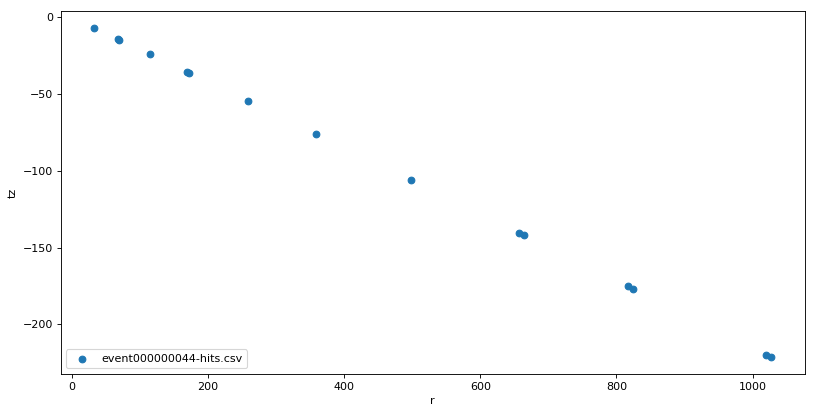

In [5]:
plt.figure(figsize=(12, 6), dpi=80)
r = np.sqrt(np.square(df['tx']) + np.square(df['ty']))
plt.scatter(x=r, y=df['tz'], label=hit_files[random_event])

plt.xlabel('r')
plt.ylabel('tz')
plt.legend(loc='lower left')

Let's take all the points and visualize them in the Parameter space.

In [6]:
lines_in_parameter_space = [(-x_i, y_i) for x_i, y_i in zip(r, df['tz'])]
lines_in_parameter_space

[(-32.9424672988255, -6.99021196),
 (-67.7471223247355, -14.3763247),
 (-69.60009066912265, -14.769592300000001),
 (-113.93829835647551, -24.181396499999998),
 (-169.55519285720254, -35.9936142),
 (-171.25086396274003, -36.3538895),
 (-258.1769961954422, -54.8377113),
 (-358.64286617053006, -76.2482147),
 (-498.2339970729748, -106.117935),
 (-663.8271708459654, -141.804977),
 (-657.3711318854358, -140.407379),
 (-817.6204805835739, -175.277802),
 (-824.5982410085875, -176.80543500000002),
 (-1019.6421969999737, -219.87855499999998),
 (-1026.7394423544724, -221.460815)]

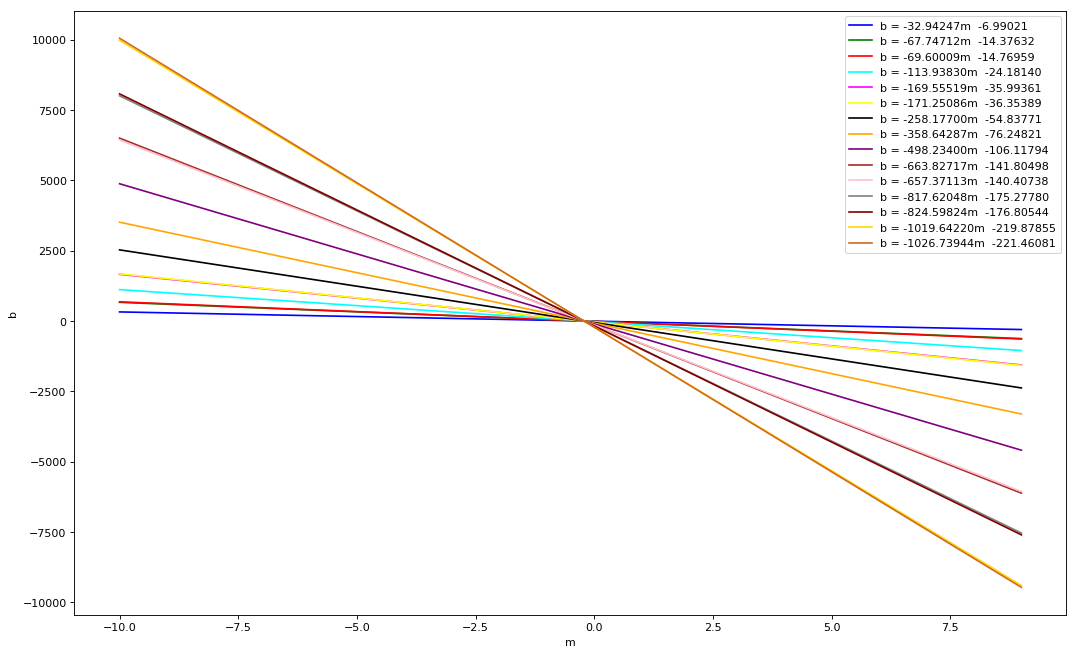

In [7]:
x_range = np.arange(-10, 10)

plt.figure(figsize=(16, 10), dpi=80)
for idx, line in enumerate(lines_in_parameter_space):
    m, b = line
    plt.plot(x_range, m * x_range + b, color=colors[idx % len(colors)],
             label=f"b = -{-m:.5f}m {('+' if b > 0 else '')} {b:.5f}")
    
plt.xlabel('m')
plt.ylabel('b')
plt.legend(loc='best')
plt.show()

Let's find all the intersection points.

In [8]:
round_accuracy = 3
intersections = {}
for idx, first_line in enumerate(lines_in_parameter_space):
    m1, b1 = first_line
    for second_line in lines_in_parameter_space[idx+1:]:
        m2, b2 = second_line
        intersection_x = round(- (b2 - b1) / (m2 - m1), round_accuracy)
        intersection_y = round(m1 * intersection_x + b1, round_accuracy)
        intersections[(intersection_x, intersection_y)] = intersections.get((intersection_x,
                                                                             intersection_y), 0) + 1

# get the parameters with the highest intersection count
optimal_m, optimal_b = max(intersections, key=intersections.get)
optimal_m, optimal_b

(-0.212, -0.014)

Let's make a plot to see the results.

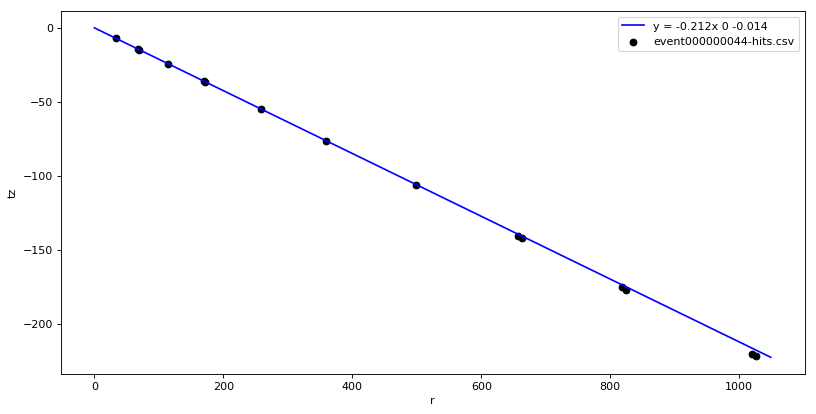

In [9]:
plt.figure(figsize=(12, 6), dpi=80)
r = np.sqrt(np.square(df['tx']) + np.square(df['ty']))
plt.scatter(x=r, y=df['tz'], label=hit_files[random_event], color='k')
xs = np.arange(0, 1050)
plt.plot(xs, optimal_m * xs + optimal_b, color='b',
         label=f"y = {optimal_m}x {('+' if optimal_b > 0 else '0')} {optimal_b}")

plt.xlabel('r')
plt.ylabel('tz')
plt.legend(loc='best')

### Now let's try for many-particle files

In [10]:
# Get all the data files
root_dir = os.path.join('..', '..', '..', 'data', 'pdg13-n25-0.5to10GeV-0.5eta')
final_files = sorted([file for file in os.listdir(root_dir) if file.endswith("-particles_final.csv")])
hit_files = sorted([file for file in os.listdir(root_dir) if file.endswith("-hits.csv")])
dfs = [pd.read_csv(os.path.join(root_dir, file)) for file in hit_files]
dfs[0]

,particle_id,geometry_id,tx,ty,tz,tt,tpx,tpy,tpz,te,deltapx,deltapy,deltapz,deltae,index
0,4503599728033792,936748859932016651,32.272884,-0.712434,-0.315054,0.107714,4.315339,-0.085583,-0.042125,4.317686,0,0,0,0,0
1,4503599946137600,936748859932016651,32.187237,-0.001743,-2.157965,0.108509,0.813235,0.009605,-0.054525,0.821937,0,0,0,0,0
2,4503599862251520,936748859932016652,31.425819,6.312224,13.246838,0.115860,1.766618,0.364646,0.745482,1.954690,0,0,0,0,0
3,4503599962914816,936748859932016652,32.797543,-5.063643,9.198400,0.114882,7.182126,-1.098788,2.013875,7.540367,0,0,0,0,1
4,4503599644147712,936748859932016666,30.526699,10.914364,5.238789,0.109587,3.401895,1.226618,0.584373,3.664715,0,0,0,0,0
5,4503599862251520,936748859932016666,32.940971,6.625372,13.886239,0.121452,1.766431,0.365555,0.745482,1.954690,0,0,0,0,1
6,4503599912583168,936748859932016679,-20.531666,-24.508099,-1.511850,0.106804,-2.511400,-3.012717,-0.185468,3.927997,0,0,0,0,0
7,4503599744811008,936748859932016694,-7.851760,-30.985767,3.505122,0.107279,-1.502871,-5.969863,0.675048,6.193927,0,0,0,0,0
8,4503599979692032,936748859932016707,6.581261,-31.393381,-11.756757,0.114065,0.470587,-2.197890,-0.823849,2.396260,0,0,0,0,0
9,4503600030023680,936748859932016707,5.025425,-31.580996,-14.615366,0.117314,0.645030,-3.992521,-1.848399,4.447924,0,0,0,0,0


In [11]:
# random_event = random.choice(range(0, len(dfs)))
# choosing specificly one event so we can document it along the way in the notebook
random_event = 38
print(f'Event chosen: {hit_files[random_event]}')
df = dfs[random_event]

Event chosen: event000000038-hits.csv


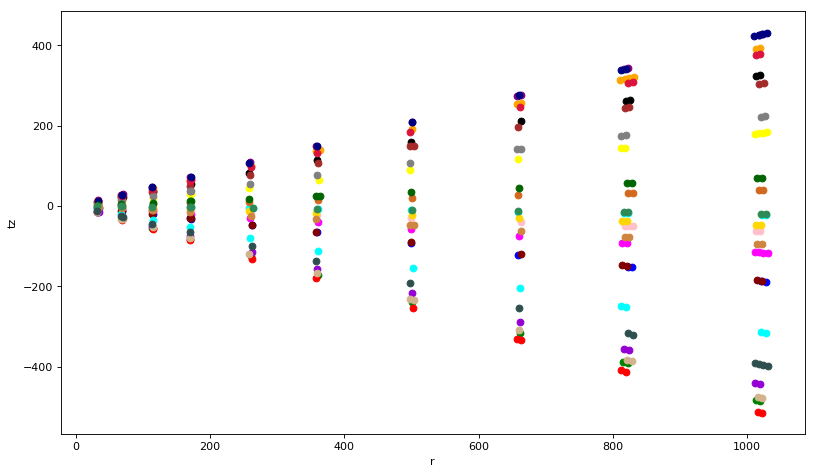

In [12]:
# get every particle
unique_particle_ids = list(set(df['particle_id']))
plt.figure(figsize=(12, 7), dpi=80)

# plot its track
for idx, pid in enumerate(unique_particle_ids):
    particle_df = df[df['particle_id'] == pid]
    r = np.sqrt(np.square(particle_df['tx']) + np.square(particle_df['ty']))
    plt.scatter(x=r, y=particle_df['tz'], color=colors[idx])

plt.xlabel('r')
plt.ylabel('tz')
plt.show()

Let's plot the points in the parameter space (where they become lines).

In [13]:
df['r'] = np.sqrt(np.square(df['tx']) + np.square(df['ty']))
lines_in_parameter_space = [(-x_i, y_i) for x_i, y_i in zip(df['r'], df['tz'])]

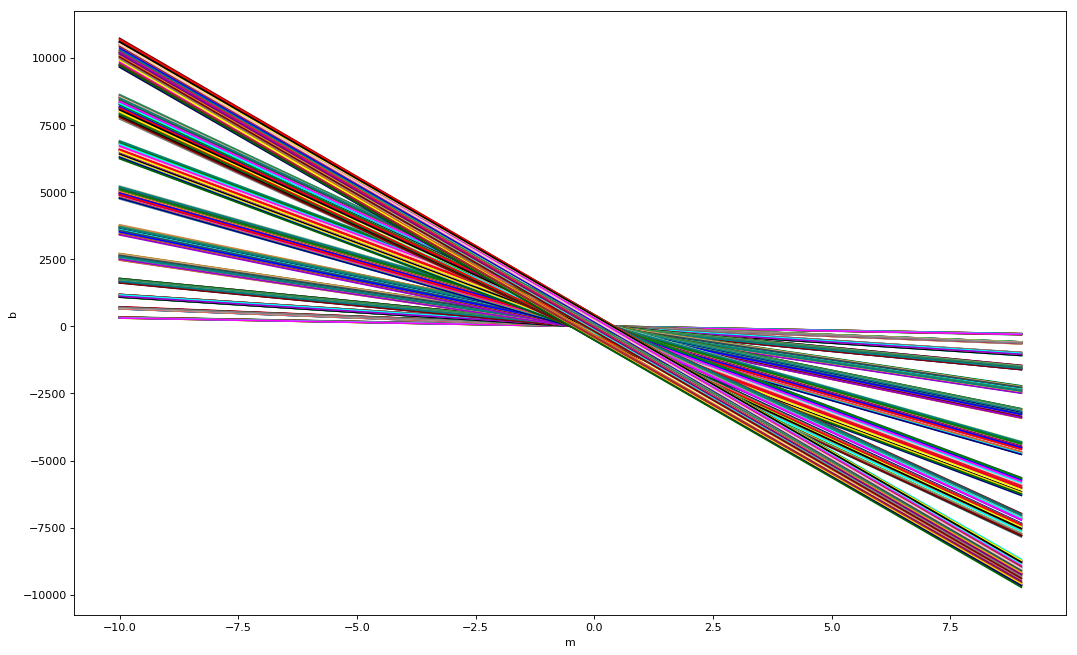

In [14]:
x_range = np.arange(-10, 10)

plt.figure(figsize=(16, 10), dpi=80)
for idx, line in enumerate(lines_in_parameter_space):
    m, b = line
    plt.plot(x_range, m * x_range + b, color=colors[idx % len(colors)])

plt.xlabel('m')
plt.ylabel('b')
plt.show()

There are about 300 lines. Since we know there are 25 particles, let's try to find the most 25 "common points of intersection".

In [15]:
round_accuracy = 2
intersections = {}
for idx, first_line in enumerate(lines_in_parameter_space):
    m1, b1 = first_line
    for second_line in lines_in_parameter_space[idx+1:]:
        m2, b2 = second_line
        intersection_x = round(- (b2 - b1) / (m2 - m1), round_accuracy)
        intersection_y = round(m1 * intersection_x + b1, round_accuracy)
        intersections[(intersection_x, intersection_y)] = intersections.get((intersection_x,
                                                                             intersection_y), 0) + 1

# get the "top 25" parameters with the highest intersection count
optimail_points = sorted(intersections, key=intersections.get, reverse=True)[:len(unique_particle_ids)]
optimail_points

[(-0.02, -0.07),
 (0.42, -0.13),
 (-0.02, 0.03),
 (-0.18, 0.03),
 (0.42, -0.33),
 (0.42, -0.49),
 (-0.02, -0.36),
 (-0.18, -0.61),
 (-0.02, 0.07),
 (-0.18, -0.11),
 (0.42, -0.06),
 (0.42, -0.09),
 (-0.02, 0.01),
 (-0.18, -0.12),
 (0.37, 0.03),
 (-0.18, 0.06),
 (-0.18, 0.02),
 (0.42, -0.2),
 (-0.47, 0.18),
 (-0.02, -0.14),
 (-0.18, -0.24),
 (0.32, 0.03),
 (0.04, -0.01),
 (0.42, -0.22)]

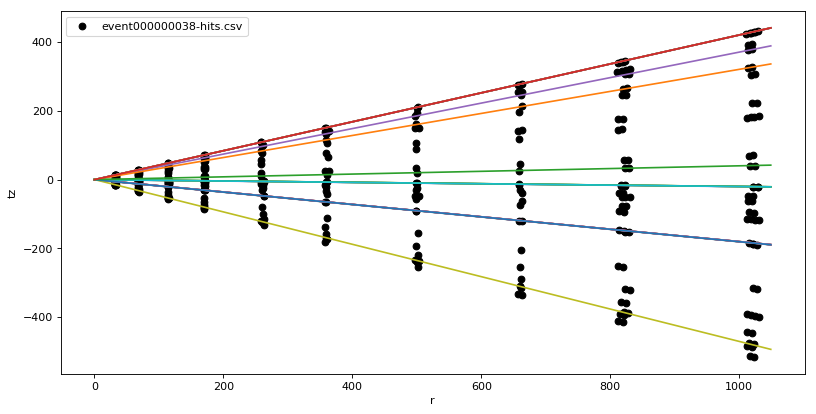

In [16]:
plt.figure(figsize=(12, 6), dpi=80)
plt.scatter(x=df['r'], y=df['tz'], label=hit_files[random_event], color='k')
xs = np.arange(0, 1050)
for idx, line in enumerate(optimail_points):
    m, b = line
    plt.plot(xs, m * xs + b)

plt.xlabel('r')
plt.ylabel('tz')
plt.legend(loc='best')

This doesn't give optimal results. Maybe it would be better to discretize the plane into small squares (bins).

In [17]:
def truncate(f, n):
    """ truncates the digits of a floating point number. e.g.: f(0.8756343, 3) = 0.875 """
    return math.floor(f * 10 ** n) / 10 ** n

In [18]:
# range of search for slope (m) and intercept (b) values
m_boundary = 1
b_boundary = 0.009
m_range = np.arange(-m_boundary, m_boundary, 0.0001)
b_range = np.arange(-b_boundary, b_boundary, 0.0001)

# accumulator array that will store the scores (votes) of the lines
accumulator = np.zeros((m_range.shape[0], b_range.shape[0]))
execution_time = time.time()

# loop for all the lines in the Hough space
for idx, first_line in enumerate(lines_in_parameter_space):
    m1, b1 = first_line

    # find intersections with all the other lines
    for second_line in lines_in_parameter_space[idx+1:]:
        m2, b2 = second_line
        intersection_x = - (b2 - b1) / (m2 - m1)
        intersection_y = m1 * intersection_x + b1

        # if intersection point is outside of the boundary, ignore
        if (not -m_boundary <= intersection_x <= m_boundary) or not (-b_boundary <= intersection_y <= b_boundary):
            continue

        # reduce to 3 decimal digits (bin size)
        reduced_x = truncate(intersection_x, 3)
        reduced_y = truncate(intersection_y, 3)

        # compute the exact bin that will contain the above (x, y) point
        bin_x = int((reduced_x + m_boundary) * 1000)
        bin_y = int((reduced_y + b_boundary) * 1000)

        # increment the accumulator for that bin
        accumulator[bin_x, bin_y] += 1

execution_time = execution_time - time.time()
print(f'Execution Time: {execution_time}')

Execution Time: -0.037512779235839844


In [19]:
def largest_indices(ary, n):
    """ Returns the n largest indices from a numpy array. """
    flat = ary.flatten()
    indices = np.argpartition(flat, -n)[-n:]
    indices = indices[np.argsort(-flat[indices])]
    return np.unravel_index(indices, ary.shape)

Let's get the "top" 25 bins.

In [20]:
l = largest_indices(accumulator, len(unique_particle_ids))
l

(array([ 977,  939,  953,  906, 1068, 1177, 1039,  980,  886,  816, 1370,
         495, 1177,  523, 1320, 1068,  532, 1418,  692, 1039, 1177,  886,
         614,  565]),
 array([ 9,  9,  9,  9,  8,  8,  8,  9,  9,  9,  8,  9,  6,  9,  8,  6,  9,
         8,  9,  6,  3, 13,  9,  9]))

In [21]:
bin_xs, bin_ys = l
est_tracks = [(x / 1000 - m_boundary, y / 1000 - b_boundary) for x, y in zip(bin_xs, bin_ys)]
est_tracks

[(-0.02300000000000002, 0.0),
 (-0.061000000000000054, 0.0),
 (-0.04700000000000004, 0.0),
 (-0.09399999999999997, 0.0),
 (0.06800000000000006, -0.0009999999999999992),
 (0.17700000000000005, -0.0009999999999999992),
 (0.038999999999999924, -0.0009999999999999992),
 (-0.020000000000000018, 0.0),
 (-0.11399999999999999, 0.0),
 (-0.18400000000000005, 0.0),
 (0.3700000000000001, -0.0009999999999999992),
 (-0.505, 0.0),
 (0.17700000000000005, -0.002999999999999999),
 (-0.477, 0.0),
 (0.32000000000000006, -0.0009999999999999992),
 (0.06800000000000006, -0.002999999999999999),
 (-0.46799999999999997, 0.0),
 (0.4179999999999999, -0.0009999999999999992),
 (-0.30800000000000005, 0.0),
 (0.038999999999999924, -0.002999999999999999),
 (0.17700000000000005, -0.005999999999999999),
 (-0.11399999999999999, 0.004),
 (-0.386, 0.0),
 (-0.43500000000000005, 0.0)]

Let's plot the tracks predicted according to the top bins selected.

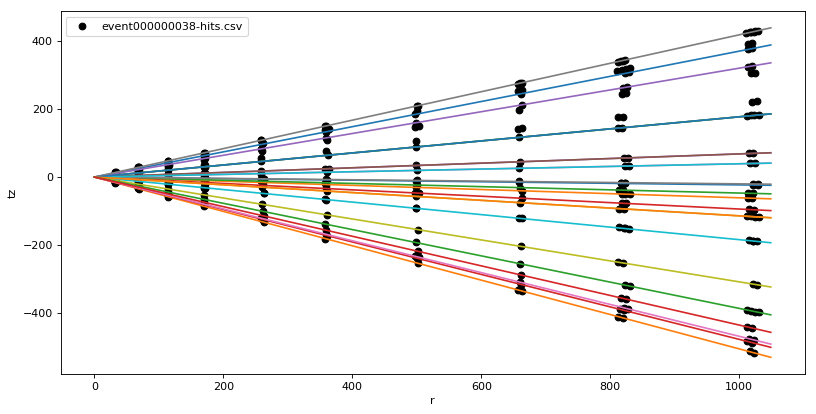

In [22]:
plt.figure(figsize=(12, 6), dpi=80)
plt.scatter(x=df['r'], y=df['tz'], label=hit_files[random_event], color='k')
xs = np.arange(0, 1050)
for track in est_tracks:
    m, b = track
    plt.plot(xs, m * xs + b)

plt.xlabel('r')
plt.ylabel('tz')
plt.legend(loc='best')

This looks much more accurate. Seems like we are missing three tracks.

### Now let's define some metrics to measure how well those lines are fitting the data

First, let's get the real (ground truth) tracks, amd plot them for a sanity check.

In [23]:
true_tracks = []
for pid in unique_particle_ids:
    particle_df = df[df['particle_id'] == pid]
    
    x1, y1 = particle_df['r'].iloc[0], particle_df['tz'].iloc[0]
    x2, y2 = particle_df['r'].iloc[-1], particle_df['tz'].iloc[-1]
    
    m = (y2 - y1) / (x2 - x1)
    b = y1 - m * x1
    true_tracks.append((m, b))
    
true_tracks

[(-0.18375799574542948, 0.005491890936497157),
 (-0.47714143716660695, 0.005602487063447015),
 (-0.5043725925469829, 0.002910729508744936),
 (-0.022111174484994417, 0.00024715289102650306),
 (-0.11357775984357023, 0.002116064770912196),
 (0.1777583110450565, -0.0010772583407421266),
 (0.32054358993364407, -0.003918637969062999),
 (0.3862191377358365, -0.04636817441574337),
 (0.41824653828273756, -0.005326560786855339),
 (0.2989778305186538, -0.03423173877056662),
 (-0.06096559921141771, 0.000422664942330897),
 (0.21713839026888482, -0.10139454773545697),
 (-0.18288553316873454, 0.10933239664294803),
 (-0.046753658749116696, 0.00043577996025456756),
 (0.03987435630378187, -0.0008342897597917176),
 (-0.30811705984523025, 0.005048141002371054),
 (-0.43568159975724247, 0.023141276150916212),
 (0.37107904494987903, -0.00540806342137401),
 (0.41796126879748063, -0.028216335571420004),
 (0.06883574225131564, -0.0007108922888066083),
 (-0.09359969834505566, 0.0017220161718314309),
 (-0.4677183

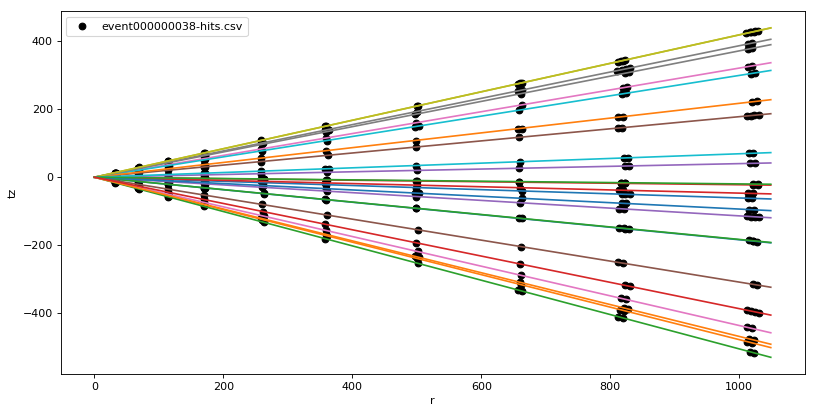

In [24]:
plt.figure(figsize=(12, 6), dpi=80)
plt.scatter(x=df['r'], y=df['tz'], label=hit_files[random_event], color='k')
xs = np.arange(0, 1050)
for track in true_tracks:
    m, b = track
    plt.plot(xs, m * xs + b)

plt.xlabel('r')
plt.ylabel('tz')
plt.legend(loc='best')

Let's define some metric functions that will assess how good the estimations are compared to the ground truths.

In [25]:
def is_effectively_same_track(track1, track2, m_threshold=0.001, b_threshold=0.05):
    """ Given some threshold, decides if two tracks are the same. """
    m1, b1, = track1
    m2, b2, = track2
    return np.abs(m1 - m2) < m_threshold and np.abs(b1 - b2) < b_threshold

In [26]:
def efficiency_rate(true_tracks, est_tracks):
    """ Basically implements an accuracy metric.
        Returns: number_of_tracks_correctly_found / total_number_of_tracks """
    counter_track_found = 0
    for idx1, t1 in enumerate(true_tracks):
        for idx2, t2 in enumerate(est_tracks):
            if is_effectively_same_track(t1, t2):
                counter_track_found += 1
                del est_tracks[idx2]
                break
    
    return counter_track_found / len(true_tracks)
    
print(f'Effieciency Rate of Estimated Tracks: {efficiency_rate(true_tracks.copy(), est_tracks.copy())}')

Effieciency Rate of Estimated Tracks: 0.75


In [27]:
def fake_rate(true_tracks, est_tracks):
    """ Finds out the percentage of estimated tracks
        that are nowhere near an actual track """
    counter_fake_tracks = 0
    for t1 in est_tracks:
        flag_close_track_was_found = False
        for t2 in true_tracks:
            if is_effectively_same_track(t1, t2, m_threshold=0.005, b_threshold=0.05):
                flag_close_track_was_found = True
                break
        if flag_close_track_was_found is False:
            counter_fake_tracks += 1
            
    return counter_fake_tracks / len(est_tracks)

print(f'Fake Rate of Estimated Tracks: {fake_rate(true_tracks, est_tracks)}')

Fake Rate of Estimated Tracks: 0.0


In [29]:
def duplicate_rate(est_tracks):
    """ Finds out how many estimated tracks are very similar
        to each other (essentially, they are duplicates) """
    counter_duplicate_tracks = 0
    for idx, t1 in enumerate(est_tracks):
        for t2 in est_tracks[idx + 1:]:
            if is_effectively_same_track(t1, t2):
                counter_duplicate_tracks += 1
                break
    
    return counter_duplicate_tracks / len(est_tracks)

print(f'Duplicate Rate of Estimated Tracks: {duplicate_rate(est_tracks):.2f}')

Duplicate Rate of Estimated Tracks: 0.21
